<a href="https://colab.research.google.com/github/Sreelakshmiml/Natural-language-processing/blob/main/word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [ ]:
reviews=["Excellent service",
"Fantastic experience",
"Outstanding performance",
"Terrible service",
"Great ambiance",
"Awful experience",
"poor quality",
"Disappointing service",
"Fabulous ambiance",
"amazing quality"]
sentiment = np.array([1,1,1,0,1,0,0,0,1,0])

In [ ]:
one_hot("Excellent service",30)

[18, 11]

In [ ]:
#performing one hot encoding
vocab_size = 30
encoded_reviews = [one_hot(d,vocab_size) for d in reviews]
print(encoded_reviews)

[[18, 11], [28, 26], [23, 5], [24, 11], [8, 20], [2, 26], [23, 12], [17, 11], [9, 20], [17, 12]]


In [ ]:
#displaying padded sequence
max_length= 3
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padded_reviews

array([[18, 11,  0],
       [28, 26,  0],
       [23,  5,  0],
       [24, 11,  0],
       [ 8, 20,  0],
       [ 2, 26,  0],
       [23, 12,  0],
       [17, 11,  0],
       [ 9, 20,  0],
       [17, 12,  0]], dtype=int32)

In [ ]:
embed_vec_size = 5 #embedded vector size
#model building
model = Sequential()
model.add(Embedding(vocab_size, embed_vec_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
x = padded_reviews
y= sentiment

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x,y,epochs=50,verbose=1)

Epoch 1/50
1/1 [==============================] - 3s 3s/step - loss: 0.6940 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6920 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6910 - accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 0s 18ms/step - loss: 0.6899 - accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 0s 20ms/step - loss: 0.6889 - accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.6879 - accuracy: 0.6000
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6869 - accuracy: 0.7000
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6859 - accuracy: 0.7000
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.7000
Epoch 11/50
1/1 [==============

In [ ]:
loss,accuracy = model.evaluate(x,y)

1/1 [==============================] - 0s 185ms/step - loss: 0.6383 - accuracy: 0.9000


In [ ]:
weights = model.get_layer('embedding').get_weights()

In [ ]:
weights[0]

array([[-0.02800043, -0.01254785, -0.03703916, -0.03130018,  0.02653105],
       [-0.01250733, -0.01876465, -0.03970333,  0.04637993,  0.01122196],
       [ 0.07875308,  0.04471827, -0.02714451, -0.01525501, -0.05667609],
       [-0.0049072 , -0.01737433,  0.01942314, -0.02420144, -0.04617689],
       [ 0.01325889, -0.04747982,  0.04612247,  0.00856377, -0.04930036],
       [-0.07957656, -0.05366097, -0.05371282, -0.0515467 ,  0.07646959],
       [-0.02765489, -0.029073  ,  0.02350515,  0.04218124, -0.01223867],
       [-0.02341304, -0.03967687,  0.01214612, -0.00207806, -0.03393199],
       [-0.09564057, -0.07289346,  0.09519091,  0.05588446,  0.0192086 ],
       [-0.06308256, -0.09287415,  0.06131688,  0.07221243,  0.01371056],
       [ 0.03414402,  0.02446849,  0.03613765, -0.02527571, -0.02609879],
       [ 0.08158106,  0.06062861,  0.05997954,  0.03400161, -0.01703851],
       [ 0.02449435,  0.03536711,  0.09495261,  0.08115345, -0.02208289],
       [ 0.03958595, -0.0388371 ,  0.0

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 71ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels= y,predictions = pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [5, 0]], dtype=int32)>

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 47.7222222222222, 'true values')

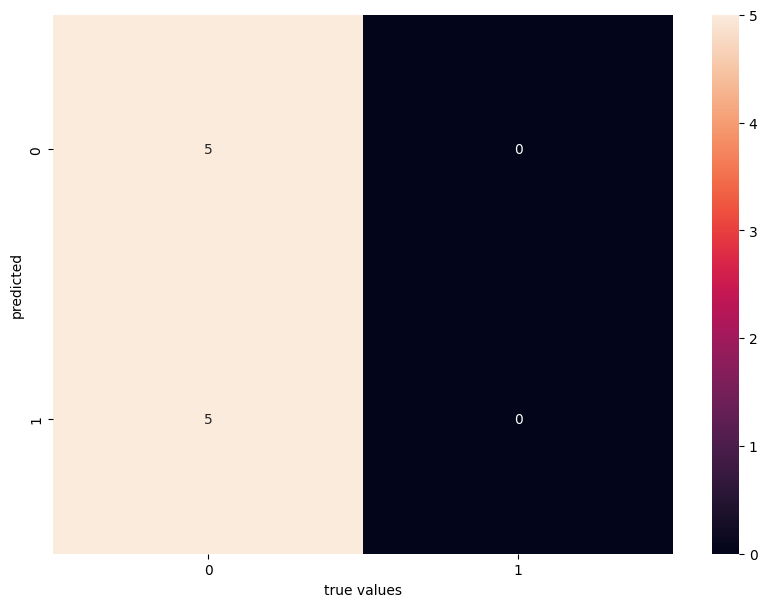

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel('predicted')
plt.xlabel('true values')